In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
X = np.array([
  [1, 5],
  [2, 6],
  [3, 5],
  [4, 5],
  [5, 6],
  [6, 7],
  [7, 8],
  [8, 8],
  [9, 9],
  [10, 9]
])

y = np.array([0,0,0,0,0,1,1,1,1,1])

In [4]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

In [7]:
m, n = X.shape
w = np.zeros(n)
b = 0
learning_rate = 0.1
epochs = 1000

for epoch in range(epochs+1):
  z = np.dot(X, w) + b
  y_hat = sigmoid(z)

  # Binary cross-entropy loss
  cost = -(1/m) * np.sum(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

  # Gradients
  dw = (1/m) * np.dot(X.T, (y_hat - y))
  db = (1/m) * np.sum(y_hat - y)

  # Update parameters
  w -= learning_rate * dw
  b -= learning_rate * db

  # Print cost every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch {epoch} | Cost: {cost:.4f}")

Epoch 0 | Cost: 0.6931
Epoch 100 | Cost: 0.2682
Epoch 200 | Cost: 0.2267
Epoch 300 | Cost: 0.2050
Epoch 400 | Cost: 0.1902
Epoch 500 | Cost: 0.1790
Epoch 600 | Cost: 0.1699
Epoch 700 | Cost: 0.1624
Epoch 800 | Cost: 0.1559
Epoch 900 | Cost: 0.1501
Epoch 1000 | Cost: 0.1450


In [8]:
w

array([ 3.14552566, -2.20478923])

In [9]:
def predict(X, w, b):
  probs = sigmoid(np.dot(X, w) + b)
  return [1 if p >= 0.5 else 0 for p in probs]

In [10]:
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


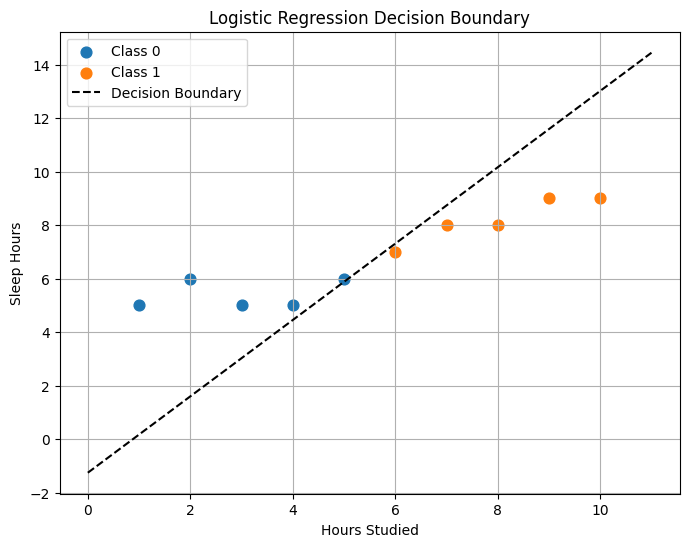

In [11]:
plt.figure(figsize=(8, 6))
for label in [0, 1]:
  plt.scatter(X[y == label][:, 0], X[y == label][:, 1], 
              label=f"Class {label}", s=60)
  
# Create a grid of x values
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
# Compute corresponding x2 using decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x2_vals = -(w[0] * x1_vals + b) / w[1]

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, 'k--', label="Decision Boundary")

plt.xlabel("Hours Studied")
plt.ylabel("Sleep Hours")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()